## python 패키지 불러오기
---

In [1]:
# 데이터 구성 패키지
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

# 데이터 시각화(추세 등) 패키지
import seaborn as sns

# 통계 분석 패키지
from scipy import stats
import scipy.stats

# 선형모델 formula
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


%matplotlib inline

In [2]:
# matplotlib 패키지 한글 깨침 처리
matplotlib.rc('font', family = 'AppleGothic')
plt.rc('font', family = 'AppleGothic')

# 1. 1-Proportion Test
---

## ▪️ 정의
- 한 집단의 비율이 특정 비율과 같은지를 검정하는 도구
    - 예) 공정의 불량률이 10%인가?

<br>

# 2. 연습 및 실습 (1-Proportion Test)
---

## [연습1]
- 고급강 A 가공하는 고객사 10% 정도
- 100여개의 업체 표본으로 했을 때, 15개의 업체가 만족 표함
- 품질개선을 한 결과로 기존보다 전체 고객 중 사용비율 차이가 있는지? (유의수준 0.05)

In [3]:
# 변수 선언
count = 15
n_obs = 100
value = 0.1

# proportion 실행
stat, pval = proportions_ztest(count, n_obs, value)

# proportion test 결과 출력
print("1 Proportion test")
print("z: {0: 0.3f}".format(stat))
print("p: {0: 0.3f}".format(pval))

1 Proportion test
z:  1.400
p:  0.161


- 결론 : 결과적으로 고급강 A 제품에 대해 품질개선 결과 기존 대비 사용비율이 차이가 있다고 할 수 없다.

## [실습1]
- 동전 정상인지 검정 위해 100번 던짐 (유의수준 0.05)
- 앞면 40번, 뒷면 60번 
- 정상적인 동전 던질 때 앞면 나올 확률 50%

In [4]:
# 변수선언
count = 40
n_obs = 100
value = 0.5

# proportion 실행
stat, pval = proportions_ztest(count, n_obs, value)

# proportion test 결과 출력
print("1 Proportion test")
print("z: {0: 0.3f}".format(stat))
print("p: {0: 0.3f}".format(pval))

1 Proportion test
z: -2.041
p:  0.041


- 결론 : 결과적으로 이 동전에 대해 정상 확인 결과 기존 대비 차이가 있다고 할 수 있다.(불량이다)

<br>

# 3. 2-Proportion Test
---

## ▪️ 정의
- 두 집단의 비율이 특정 비율과 같은지를 검정하는 도구
    - 예) 동일한 제품 생산하는 두 공장에서 불량률 측정 후, 두 공정의 불량률이 같은지 비교

<br>

# 4. 연습 및 실습 (2-Proportion Test)
---

## [연습1]
- 동일한 제품 생상하는 두 공장에서 불량률 측정
- 두 공정의 불량률이 같다고 할 수 있는지?

In [5]:
# 변수 선언
count = np.array([4,1])
nobs = np.array([1000, 1200])

# proportion test 실행
stat,pval = proportions_ztest(count, nobs)

# proportion test 결과 출력
print("2 Proportion test")
print("z: {0: 0.3f}".format(stat))
print("p: {0: 0.3f}".format(pval))

2 Proportion test
z:  1.553
p:  0.120


- p-value>0.05 이므로 두 공장의 불량률은 차이가 있다고 할 수 없다.

## [실습1]
- 동일한 제품 생상하는 두 공장에서 불량률 측정
- 두 공정의 불량률이 같다고 할 수 있는지?

In [6]:
# 변수 선언
count = np.array([14,5])
nobs = np.array([1200, 1200])

# proportion test 실행
stat,pval = proportions_ztest(count, nobs)

# proportion test 결과 출력
print("2 Proportion test")
print("z: {0: 0.3f}".format(stat))
print("p: {0: 0.3f}".format(pval))

2 Proportion test
z:  2.073
p:  0.038


- p-value<0.05 이므로 두 공장의 불량률은 차이가 있다고 할 수 있다.

<br>

# 5. 카이제곱 검정
---

## ▪️ 정의
- **관찰된 빈도가 기대되는 빈도와 의미 있게 다른지의 여부를 검증하는 방법**
- 자료가 빈도로 주어졌을 때, 특히 범주형 자료의 분석에 이용

## ▪️ 절차
### 1) 동일성 검정
- 특성 별 두 가지 이상으로 범류된 범주간에 <u>상호 동일한 비율로 나타나는가</u>를 검정하고자 할 때
    - 조별 작업분에 대해 각 강종별 조별로 불량율 차이가 있는지?

### 2) 독립성 검정
- 특성 별 두 가지 이상으로 분류된 범주간에 <u>상호 관련성이 있는지를 검정</u>하고자 할 때 사용
    - 자동차 브랜드와 거주지 사이의 관계

### 3) 적합도 검정
- 어떤 특성치 또는 사건이 <u>기대치에 따라 발생했는지 여부를 검정</u>하고자 할 때
    - 완두콩 수확 결과가 멘델의 유전법칙(9:3:3:1)과 일치하는지?

## ▪️ 카이제곱 검정통계량의 의미
- 검정통계량이 **크다** : 실측치 대비 기대치의 차이가 크다
    - 귀무가설 기각
- 검정통계량이 **작다** : 실측치와 기대치의 차이가 작다
    - 귀무가설 채택

## ▪️ 임계치 X^(α, df)
### 1) α
- 유의수준

### 2) df
- 카이제곱 분포에서의 자유도
- (row-1)(col-1)

<br>

# 6. 연습 및 실습 (카이제곱 검정)
---

## [연습1]
- 근무조별로 철강제품 생산. 생산 제품의 규격이 3가지 종류
- 근무조별로 제품을 생산하는 부하의 차이가 있는지? (유의수준 0.05)

In [7]:
from scipy import stats

In [8]:
# 데이터 불러오기
df = pd.read_csv("../data/카이제곱_근무조.csv")
df.head()

,work_1,work_2,work_3,work_4
0,270,260,236,234
1,228,285,225,262
2,277,284,231,208


In [11]:
# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df.T)

# chi-square test 결과 출력
print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print("p:{0:0.3f}".format(pval))
print("degree of freedom:{}".format(dof))
print("expected value: \n{}".format(expected.round(3)))

chi-square test
chisq:13.366
p:0.038
degree of freedom:6
expected value: 
[[258.333 258.333 258.333]
 [276.333 276.333 276.333]
 [230.667 230.667 230.667]
 [234.667 234.667 234.667]]


- 결론 : 유의수준 5%에서 근무조별로 제품을 생산하는 부하 차이가 있다고 할 수 있다.

In [12]:
# 자 그러면 생각해보자고..
# 귀무가설 : 차이가 없다
# 대립가설 : 차이가 있다
#p-value가 0.038로 유의수준 0.05보다 작다이가 그래서 귀무가설 기각한디
#그래서 부하 차이가 있대

## [실습1]
- 노트북 6가지 제품에 대하여 7가지 제품의 이미지를 중복선택할 수 있도록
- 32명의 소비자 대상으로 설문
- 각 제품에 대해 이미지 차이가 있는지? (유의수준 0.05)

In [13]:
# 데이터 불러오기
df = pd.read_csv("../data/카이제곱_노트북.csv")
df.head()

,A,B,C,D,E,F
0,18,8,4,4,3,3
1,2,2,1,1,1,25
2,14,14,3,2,3,8
3,5,5,4,3,1,10
4,5,5,9,2,1,2


In [16]:
# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df.T)

# chi-square test 결과 출력
print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print("p:{0:0.3f}".format(pval))
print("degree of freedom:{}".format(dof))
print("expected value: \n{}".format(expected.round(3)))

chi-square test
chisq:95.759
p:0.000
degree of freedom:30
expected value: 
[[10.224  8.179 11.247  7.157  6.135  8.179  5.879]
 [ 8.43   6.744  9.274  5.901  5.058  6.744  4.848]
 [ 5.381  4.305  5.919  3.767  3.229  4.305  3.094]
 [ 3.946  3.157  4.341  2.762  2.368  3.157  2.269]
 [ 1.973  1.578  2.17   1.381  1.184  1.578  1.135]
 [10.045  8.036 11.049  7.031  6.027  8.036  5.776]]


- 결론 : 유의수준 5%에서 노트북 제품별 이미지 차이가 있다고 할 수 있다.

<br>

# 7. ANOVA(ANalysis Of VAriance)
---

## ▪️ 정의
- <u>비교대상이 되는 집단들 간의 평균의 차이를 검정</u>하기 위해 <u>총 변동을 요인의 수준차이로 설명되는 변동과 설명될 수 없는 변동으로 분해</u>하여 이 두 변동의 비가 통계적으로 유의한지를 검정하는 분석방법
- 세(두) 개 이상의 표본 평균을 동시에 비교하는 분석 기법

## ▪️ 분산 검정
- 두 개 이상의 집단간 모 분산이 동일한 지를 검정하는 도구

### 1) 2 Variences (F-test)
- 두 집단 간의 분산 비교
    - 과제 전후 배송 시간의 산포가 같은가
    
### 2) Equal Varience
- 세 집단 간의 분산 비교
    - 강종별 2차정련 시간의 산포가 같은가

## ▪️ 용어 정의
### 1) 분산분석(ANOVA)
- **두 개 이상 다수의 집단을 비교하고자 할 때,** 집단 내의 분산, 총편균과 각 집단의 평균의 차이에 의해 생긴 집단 간 분산의 비교를 통해 만들어진 **F분포를 이용하여 가설검정 하는 방법**
    
### 2) 일원분산분석(one-way ANOVA)
- **종속변수 1개, 독립변수 집단이 2개 이상인 경우**
    - 가구 소득에 따른 식료품소비정도의 차이
    - 국가간 20대 여성의 체중 비교
    
### 3) 이원분산분석(two-way ANOVA)
- **독립변수의 수가 두 개 이상일 때 집단 간 차이가 유의한지를 검증하는 데 사용**
    - 학력 및 성별에 따른 휴대폰 요금의 차이
    - 국가간 성별과 학력에 따른 체중 비교

<br>

# 8. 연습 및 실습 (ANOVA)
---

## [연습1] : One way ANOVA
- 마케팅실 그룹별 직원들의 토익 성적 차이
- 그룹 간의 토익 점수의 차이 여부 검정(유의수준 0.05)

<AxesSubplot:>

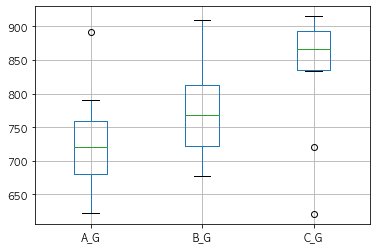

In [17]:
# 데이터 불러오기
df = pd.read_csv("../data/ANOVA1.csv")
df.head()

# group 별 boxplot
df.boxplot(['A_G', 'B_G', 'C_G'])

In [18]:
# ANOVA 실행
f_result = stats.f_oneway(df['A_G'], df['B_G'], df['C_G'])

# ANOVA의 f,p값 저장
f,p = f_result.statistic.round(3),\
        f_result.pvalue.round(3)

# ANOVA의 f,p값 출력
print("One-way")
print("F 통계량: {0: 0.3f}".format(f))
print("p-value: {0: 0.3f}".format(p))

One-way
F 통계량:  4.263
p-value:  0.025


- 유의수준 5%에서 검정결과 p값이 0.05이므로 그룹 간의 평균차이가 있다고 할 수 있다.

## [실습1]  : One way ANOVA
- 강종별과 type에 따라 2차 정련 시간에 차이가 있는지 검정(유의수준 0.05)

In [22]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [23]:
# 데이터 불러오기
df = pd.read_csv("../data/ANOVA.csv")
df.head()

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a


<AxesSubplot:title={'center':'time'}, xlabel='gangjong'>

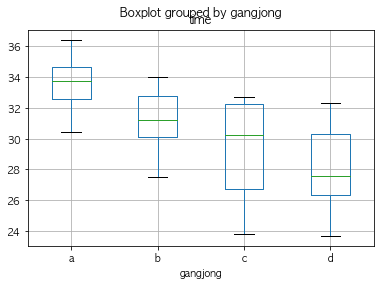

In [24]:
# group 별 boxplot
df.boxplot('time', by='gangjong')

In [25]:
# ANOVA 실행
# statsmodels 라이브러리 사용
formula = 'time ~ C(gangjong)'
lm = ols(formula, df).fit()

print(anova_lm(lm))

               df      sum_sq    mean_sq         F    PR(>F)
C(gangjong)   3.0  104.603333  34.867778  4.171868  0.019013
Residual     20.0  167.156667   8.357833       NaN       NaN


- 결론 : 유의수준 5%에서 p값이 0.019이므로 강종별 2차 정련 시간에 차이가 있다고 할 수 있다.